In [9]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics.cluster import contingency_matrix 
from tqdm import tqdm

In [10]:
%store -r test

# Take the name of the different classes (e.g. '0', '1', '2', ...)
classes = test.groupby(['label'])['label'].unique().index.to_list()

In [11]:
predicted_test = test.copy()

feature_1= 'x'
feature_2='y'
feature_3='arctan2_2'

models = []
for n_class in classes: # Can be thrown an expection beacuse this is the labels of the test set and not of the models (train set)
    model = pickle.load(open('models_7/'+str(n_class)+'hmm_model.pkl', 'rb'))
    models.append(model)

#log_likelihoods = pd.DataFrame()
#log_likelihoods['predicted_class'] = classes
#log_like_max = []
#top_3_loglikelihood = []
top_3_predicted_classes = []
predicted_class = []
#is_predicted = []
true_label=[]

for i in tqdm(range(len(test))):
    angle_1 = test[feature_1].iloc[i][:-1]
    angle_2 = test[feature_2].iloc[i][:-1]
    angle_3 = test[feature_3].iloc[i]
 
    X=np.array([angle_1,angle_2,angle_3]).T
    # print(X)
    true_label.append(test['label'].iloc[i])
    list_log_likelihoods = []
    for model in models:
        
        list_log_likelihoods.append(model.score(X,lengths=len(X)))
        pass

    predicted_class.append(np.argmax(list_log_likelihoods))

    top_3_values = sorted(list_log_likelihoods)[-3:]
    top_3_predicted_classes.append([i for i, x in enumerate(list_log_likelihoods) if x == top_3_values[0] or x == top_3_values[1] or x == top_3_values[2]])
    

100%|██████████| 248/248 [00:02<00:00, 119.56it/s]


In [12]:
print(predicted_class)
print(true_label)

print(len(predicted_class))
print(len(true_label))

[4, 1, 9, 3, 5, 8, 0, 4, 6, 0, 8, 4, 2, 2, 6, 4, 3, 5, 1, 2, 8, 0, 9, 0, 5, 3, 0, 4, 5, 2, 4, 8, 2, 0, 0, 4, 2, 1, 2, 9, 3, 2, 4, 3, 1, 7, 5, 5, 8, 6, 7, 4, 5, 3, 3, 1, 0, 1, 6, 8, 9, 0, 6, 9, 9, 8, 1, 0, 2, 4, 5, 2, 6, 9, 3, 4, 4, 2, 6, 0, 1, 9, 8, 7, 2, 8, 7, 5, 5, 8, 5, 1, 8, 4, 1, 9, 8, 2, 8, 7, 3, 0, 6, 8, 5, 5, 2, 1, 1, 9, 1, 7, 5, 5, 3, 3, 4, 3, 6, 4, 5, 5, 3, 6, 0, 7, 6, 3, 0, 6, 0, 2, 7, 7, 8, 8, 5, 1, 6, 9, 8, 3, 9, 4, 7, 0, 7, 3, 8, 3, 4, 6, 7, 0, 7, 8, 4, 0, 6, 7, 9, 6, 9, 4, 4, 0, 8, 8, 0, 4, 4, 9, 8, 5, 6, 6, 0, 9, 8, 0, 4, 1, 4, 3, 8, 8, 3, 8, 3, 0, 5, 9, 2, 5, 8, 1, 5, 0, 8, 7, 6, 6, 0, 1, 1, 3, 7, 8, 5, 3, 6, 0, 0, 4, 3, 7, 0, 7, 0, 3, 9, 6, 2, 2, 5, 3, 9, 9, 6, 7, 1, 4, 1, 2, 6, 3, 9, 1, 0, 8, 0, 8, 7, 2, 1, 2, 5, 6]
[4, 1, 9, 3, 5, 8, 0, 4, 6, 0, 8, 4, 7, 2, 6, 4, 7, 3, 1, 2, 8, 0, 9, 0, 5, 3, 6, 4, 5, 2, 4, 5, 2, 0, 0, 4, 2, 1, 2, 9, 3, 2, 9, 3, 1, 7, 5, 5, 8, 6, 7, 4, 5, 3, 3, 1, 0, 9, 6, 8, 9, 0, 6, 9, 9, 8, 1, 0, 2, 4, 5, 2, 6, 9, 3, 4, 4, 2, 6, 0, 9, 9, 8, 7, 2,

In [13]:
matrix=contingency_matrix(true_label, predicted_class)
print(matrix)

[[28  0  0  0  0  1  2  0  3  0]
 [ 1 20  0  0  0  0  0  1  0  1]
 [ 0  0 20  3  0  0  0  0  0  0]
 [ 0  0  0 21  0  1  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  0  1]
 [ 0  0  0  1  0 22  0  0  2  0]
 [ 2  0  0  0  0  0 23  0  0  0]
 [ 0  0  1  1  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0 24  0]
 [ 0  2  0  0  2  1  0  0  2 19]]


In [14]:

accuracy=np.sum(np.diag(matrix))/np.sum(matrix)
print("Accuracy: ", accuracy)

Accuracy:  0.8870967741935484


In [15]:
# Calculate top 3 accuracy
sum_top_3 = 0
for i in range(len(top_3_predicted_classes)):
    if true_label[i] in top_3_predicted_classes[i]:
        sum_top_3 += 1

accuracy_top_3 = sum_top_3/len(predicted_test["label"])
print("Accuracy top 3: ", accuracy_top_3)

Accuracy top 3:  0.9556451612903226


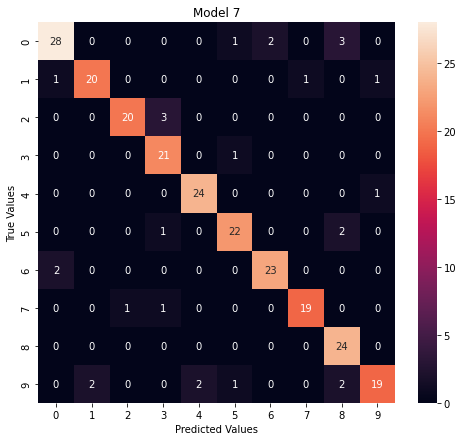

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_df = pd.DataFrame(matrix,
                     index = ['0','1','2','3','4','5','6','7','8','9'], 
                     columns = ['0','1','2','3','4','5','6','7','8','9'])

plt.figure(figsize=(8,7))
sns.heatmap(cm_df, annot=True)
plt.title('Model 7')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()